<a href="https://colab.research.google.com/github/OmarFarukNoman/Into-to-Machine-Learning/blob/main/Homework-2/Problem_2b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

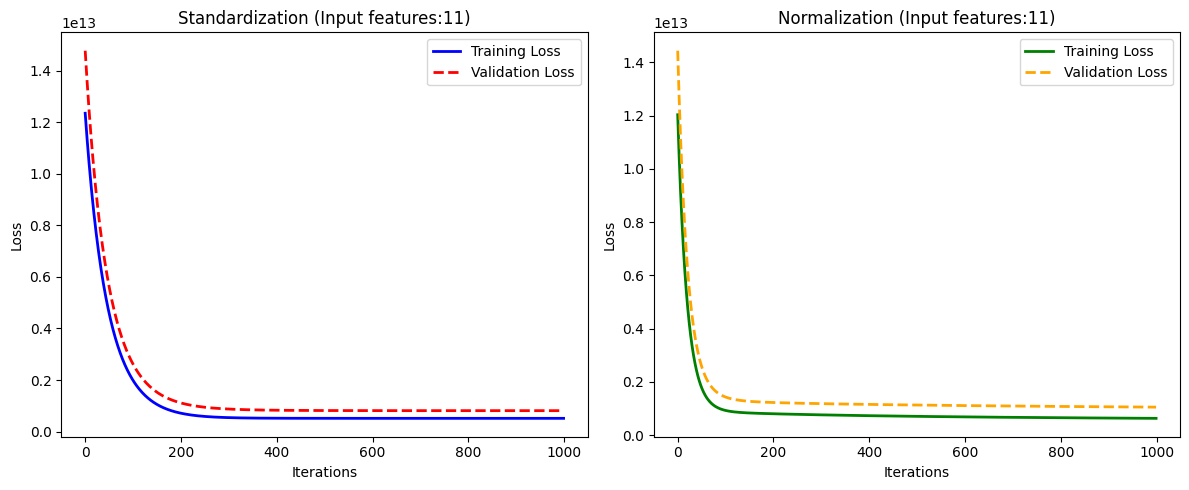

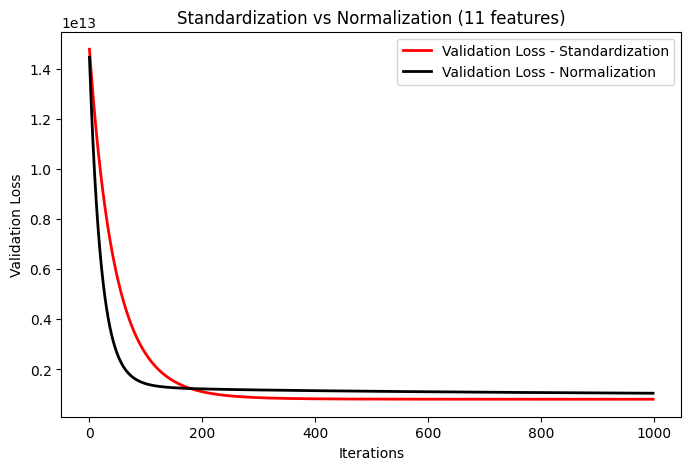


For Standardization (Input features:11)
Learning Rate: 0.01
Final Training Loss: 516559782610.89
Final Validation Loss: 814250880395.60
Theta values: [4690108.49966251  462483.86092239   73575.10460689  466402.28818485
  448809.32634137  175152.44100677  129246.67790986  137761.8440275
  197870.7985078   393551.54697235  283187.94361822  311902.44477997]

Parameters:
Theta_0: 4690108.50
area (theta_1): 462483.86
bedrooms (theta_2): 73575.10
bathrooms (theta_3): 466402.29
stories (theta_4): 448809.33
mainroad (theta_5): 175152.44
guestroom (theta_6): 129246.68
basement (theta_7): 137761.84
hotwaterheating (theta_8): 197870.80
airconditioning (theta_9): 393551.55
parking (theta_10): 283187.94
prefarea (theta_11): 311902.44

For Normalization (Input features:11)
Learning Rate: 0.01
Final Training Loss: 632200874934.67
Final Validation Loss: 1053295894053.12
Theta values: [1815705.08727265  994141.62887366 1014405.0533435   922766.40197763
 1251244.00283737 1046095.29182687  411921.728531

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# For HW2, we're using housing dataset as per instruction.
url = "https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/Housing.csv"
h_data = pd.read_csv(url)

# I've defined i/p and o/p for this problem with ALL specified features
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
           'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']

X_in = h_data[features].copy()
y_out = h_data['price'].values.reshape(-1, 1) #It converts the output as a 1D array with m=5 rows

# There are some categorical value. I've changed them to numerical
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in categorical_cols:
    X_in[col] = X_in[col].map({'yes': 1, 'no': 0})

X_in = X_in.values

# I've splitted the dataset into traning (80%) and validation (20%)
X_train, X_val, y_train, y_val = train_test_split(X_in, y_out, test_size=0.2, random_state=80)

# I've used normalization and standardization
def standardize_features(X_train, X_val):
    X_mean = X_train.mean(axis=0)
    X_std = X_train.std(axis=0)
    X_std[X_std == 0] = 1  # Avoid division by zero
    X_train_std = (X_train - X_mean) / X_std
    X_val_std = (X_val - X_mean) / X_std
    return X_train_std, X_val_std

def normalize_features(X_train, X_val):
    X_min = X_train.min(axis=0)
    X_max = X_train.max(axis=0)
    X_train_norm = (X_train - X_min) / (X_max - X_min)
    X_val_norm = (X_val - X_min) / (X_max - X_min)
    return X_train_norm, X_val_norm

X_train_std, X_val_std = standardize_features(X_train, X_val)
X_train_norm, X_val_norm = normalize_features(X_train, X_val)

# Gradient descent
def gradient_descent(X_in, y_out, X_val, y_val, learning_rate, max_iterations):
    m, n = X_in.shape
    X_b = np.c_[np.ones((m, 1)), X_in]

    m_val = X_val.shape[0]
    X_val_b = np.c_[np.ones((m_val, 1)), X_val]

    theta = np.zeros((n + 1, 1))
    train_losses = []
    val_losses = []

    for iteration in range(max_iterations):
        gradients = (1/m) * X_b.T @ (X_b @ theta - y_out)
        theta -= learning_rate * gradients

        train_loss = (1/(2*m)) * np.sum((X_b @ theta - y_out)**2)
        val_loss = (1/(2*m_val)) * np.sum((X_val_b @ theta - y_val)**2)

        train_losses.append(train_loss)
        val_losses.append(val_loss)

    return theta, train_losses, val_losses

learning_rate = 0.01
max_iterations = 1000

theta_std, train_losses_std, val_losses_std = gradient_descent(X_train_std, y_train, X_val_std, y_val, learning_rate, max_iterations)
theta_norm, train_losses_norm, val_losses_norm = gradient_descent(X_train_norm, y_train, X_val_norm, y_val, learning_rate, max_iterations)


plt.figure(figsize=(12, 5))

# Standardization
plt.subplot(1, 2, 1)
plt.plot(train_losses_std, label='Training Loss', linewidth=2, color='blue')
plt.plot(val_losses_std, label='Validation Loss', linewidth=2, linestyle='--', color='red')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Standardization (Input features:11)')
plt.legend()


# Normalization
plt.subplot(1, 2, 2)
plt.plot(train_losses_norm, label='Training Loss', linewidth=2, color='green')
plt.plot(val_losses_norm, label='Validation Loss', linewidth=2, linestyle='--', color='orange')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Normalization (Input features:11)')
plt.legend()


plt.tight_layout()
plt.show()

# Combined comparison plot
plt.figure(figsize=(8, 5))
plt.plot(val_losses_std, label='Validation Loss - Standardization', linewidth=2, color='red')
plt.plot(val_losses_norm, label='Validation Loss - Normalization', linewidth=2, color='black')
plt.xlabel('Iterations')
plt.ylabel('Validation Loss')
plt.title('Standardization vs Normalization (11 features)')
plt.legend()
plt.show()

# Standardization result
print("\nFor Standardization (Input features:11)")
print(f"Learning Rate: {learning_rate}")
print(f"Final Training Loss: {train_losses_std[-1]:.2f}")
print(f"Final Validation Loss: {val_losses_std[-1]:.2f}")
print(f"Theta values: {theta_std.flatten()}")

# Best parameters for Standardization
print("\nParameters:")
print(f"Theta_0: {theta_std[0][0]:.2f}")
for i, feature in enumerate(features):
    print(f"{feature} (theta_{i+1}): {theta_std[i+1][0]:.2f}")

# Normalization result
print("\nFor Normalization (Input features:11)")
print(f"Learning Rate: {learning_rate}")
print(f"Final Training Loss: {train_losses_norm[-1]:.2f}")
print(f"Final Validation Loss: {val_losses_norm[-1]:.2f}")
print(f"Theta values: {theta_norm.flatten()}")

# Best parameters for Normalization
print("\nParameters:")
print(f"Theta_0: {theta_norm[0][0]:.2f}")
for i, feature in enumerate(features):
    print(f"{feature} (theta_{i+1}): {theta_norm[i+1][0]:.2f}")
